Mục tiêu của bài thực hành là trình bày cách thực hiện regularization: dropout và L2.   
Khai báo thư viện:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from init_utils import plot_decision_boundaryth2
from keras.layers import Input, Dense, Dropout
from keras.regularizers import l2
from keras.models import Model

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


Load dữ liệu:

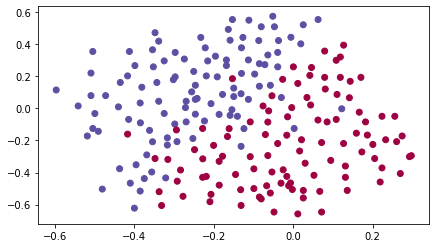

In [2]:

data = scipy.io.loadmat('datasets/data.mat')
train_X = data['X']
train_Y = data['y']
test_X = data['Xval']
test_Y = data['yval']
plt.scatter(train_X.T[0, :], train_X.T[1, :], c=train_Y.T, cmap=plt.cm.Spectral);

Mô hình NN không regularization

In [3]:
def model1(input_shape):
    X_input = Input(input_shape)
    X = Dense(20, activation='relu')(X_input)
    X = Dense(3, activation='relu')(X)
    X = Dense(1, activation='sigmoid')(X)
    model = Model(inputs = X_input, outputs = X, name='model1')

    return model


In [4]:
Model1 = model1(train_X.shape[1:])

In [5]:
Model1.compile(loss ='binary_crossentropy', metrics = ["accuracy"])

In [6]:
Model1.fit(x = train_X, y = train_Y,epochs = 500)

 - accuracy: 0.9386
Epoch 481/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9278
Epoch 482/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9291
Epoch 483/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9455
Epoch 484/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9351
Epoch 485/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9324
Epoch 486/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9486
Epoch 487/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9417
Epoch 488/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9424
Epoch 489/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9408
Epoch 490/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1843 - accurac

In [7]:
preds_train = Model1.evaluate(x = train_X, y = train_Y)
preds_test = Model1.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

7/7 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9250

Loss = 0.21115919947624207
Train Accuracy = 0.9383886456489563

Loss = 0.26243263483047485
Test Accuracy = 0.925000011920929


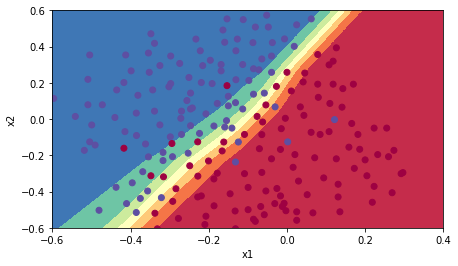

In [8]:
plot_decision_boundaryth2(lambda x: Model1.predict(x), train_X.T, train_Y.T)

Mô hình với Dropout

In [9]:
def model2(input_shape):
    X_input = Input(input_shape)
    X = Dense(20, activation='relu')(X_input)
    X = Dropout(0.7)(X)
    X = Dense(3, activation='relu')(X)
    X = Dense(1, activation='sigmoid')(X)
    model = Model(inputs = X_input, outputs = X, name='model2')

    return model

In [10]:
Model2 = model2(train_X.shape[1:])

In [11]:
Model2.compile(loss ='binary_crossentropy', metrics = ["accuracy"])

In [12]:
Model2.fit(x = train_X, y = train_Y, epochs = 500)

 - accuracy: 0.9019
Epoch 481/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8899
Epoch 482/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8798
Epoch 483/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9032
Epoch 484/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.9051
Epoch 485/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9160
Epoch 486/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8894
Epoch 487/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9099
Epoch 488/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9051
Epoch 489/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9231
Epoch 490/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2896 - accurac

In [13]:
preds_train = Model2.evaluate(x = train_X, y = train_Y)
preds_test = Model2.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

7/7 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9300

Loss = 0.21340392529964447
Train Accuracy = 0.9241706132888794

Loss = 0.25465479493141174
Test Accuracy = 0.9300000071525574


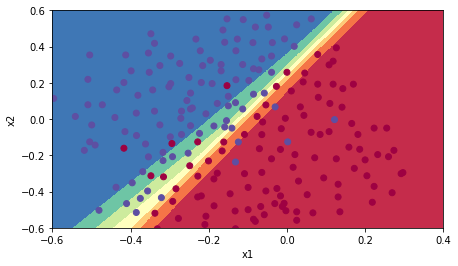

In [14]:
plot_decision_boundaryth2(lambda x: Model2.predict(x), train_X.T, train_Y.T)

Mô hình với L2

In [15]:
def model3(input_shape):
    X_input = Input(input_shape)
    X = Dense(20, activation='relu')(X_input)
    X = Dense(3, activation='relu')(X)
    X = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.7))(X)
    model = Model(inputs = X_input, outputs = X, name='model3')

    return model

In [16]:
Model3 = model3(train_X.shape[1:])

In [17]:
Model3.compile(loss ='binary_crossentropy', metrics = ["accuracy"])

In [18]:
Model3.fit(x = train_X, y = train_Y, epochs = 500)

 - accuracy: 0.9323
Epoch 481/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9196
Epoch 482/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.9196
Epoch 483/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.9054
Epoch 484/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9182
Epoch 485/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2793 - accuracy: 0.9124
Epoch 486/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.9385
Epoch 487/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.9199
Epoch 488/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.9267
Epoch 489/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9237
Epoch 490/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3105 - accurac

In [19]:
preds_train = Model3.evaluate(x = train_X, y = train_Y)
preds_test = Model3.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

7/7 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.9350

Loss = 0.26798009872436523
Train Accuracy = 0.9241706132888794

Loss = 0.28285983204841614
Test Accuracy = 0.9350000023841858


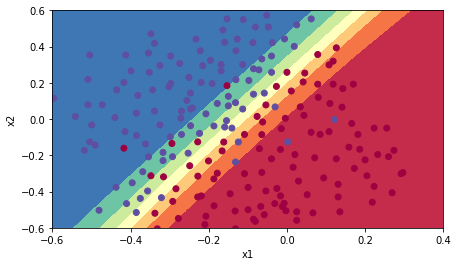

In [20]:
plot_decision_boundaryth2(lambda x: Model3.predict(x), train_X.T, train_Y.T)